In [2]:
import numpy as np
import pandas as pd

In [8]:
dataset=pd.read_csv("E:\Documents\engineering\internship\machine learning\spam sms detection\dataset\spam.csv",encoding='ISO-8859-1')
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [34]:
X=dataset["v2"]
Y=dataset["v1"]

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X = tfidf_vectorizer.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [37]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [38]:
y_pred = model.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9757847533632287

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[965,   0],
       [ 27, 123]], dtype=int64)

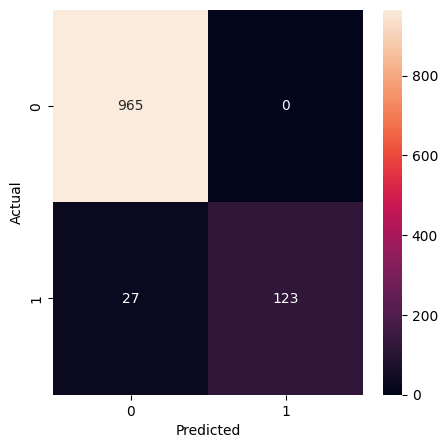

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test,y_pred))